<a href="https://colab.research.google.com/github/Sheila-Otieno/Machine-learning/blob/main/Gender_detection_using_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=3e05e0bf20f22ef1ff9e27b1f05af7202a460b1cce486e8440cd552e7ce10a34
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=984e2a5f5a8e2198b870ea6e1ec738f769fd6f15d6cbdccd9cc3843e5b537a3c
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [10]:
import cv2
import cvlib as cv
import sys
import numpy as np
from numpy.lib.type_check import imag
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import files
uploaded = files.upload()

Saving man_image.jpg to man_image.jpg


In [7]:
image = cv2.imread("man_image.jpg")

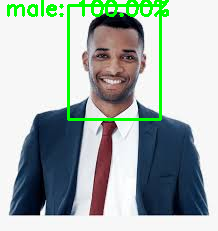

In [12]:
face, confidence = cv.detect_face(image)
padding = 20

for i in face:
    (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
    (x2, y2) = min(image.shape[1]-1, i[2]+padding), min(image.shape[0]-1,i[3]+padding)
    cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
    crop = np.copy(image[y:y2, x:x2])
    (label, confidence) = cv.detect_gender(crop)
    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    Y = y - 10 if y -10 > 10 else y + 10
    cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving female_image.jpg to female_image.jpg


In [14]:
image2 = cv2.imread("female_image.jpg")

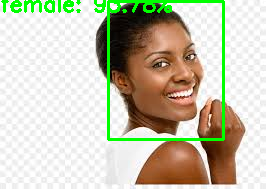

In [17]:
face, confidence = cv.detect_face(image2)
padding = 20

for i in face:
    (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
    (x2, y2) = min(image2.shape[1]-1, i[2]+padding), min(image2.shape[0]-1,i[3]+padding)
    cv2.rectangle(image2, (x, y), (x2, y2), (0, 255, 0), 2)
    crop = np.copy(image2[y:y2, x:x2])
    (label, confidence) = cv.detect_gender(crop)
    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    Y = y - 10 if y -10 > 10 else y + 10
    cv2.putText(image2, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

cv2_imshow(image2)
cv2.waitKey()
cv2.destroyAllWindows()